# Assignment 1: Practice Lab: Linear Regression

## 1 Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 Problem Statement

# 3 Dataset

In [2]:
x_train,y_train=load_data()

In [3]:
print("Type of x_train:",type(x_train))

Type of x_train: <class 'numpy.ndarray'>


In [4]:
x_train

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [5]:
len(x_train)

97

In [7]:
print("Type of y train:",type(y_train))
len(y_train)
y_train

Type of y train: <class 'numpy.ndarray'>


97

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [8]:
x_train.shape
y_train.shape

(97,)

(97,)

Text(0.5, 0, 'Population of city in 10,000s')

Text(0, 0.5, 'Profit in 10,000')

Text(0.5, 1.0, 'Profits vs. Population per city')

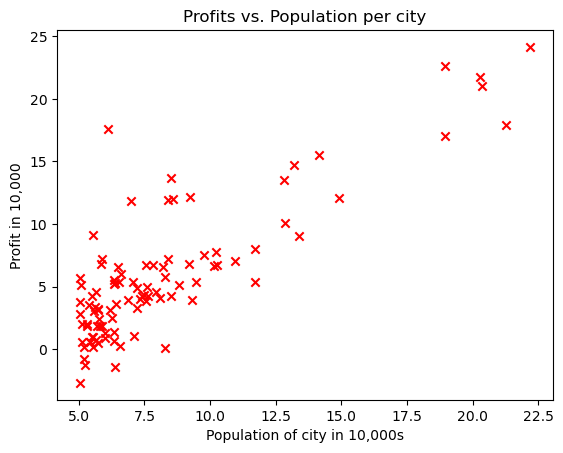

In [10]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in 10,000")
plt.title("Profits vs. Population per city")

# 4 Refresher on linear regression

# 5 Compute Cost

### Exercise 1

In [12]:
def compute_cost(x,y,w,b):
    cost=0
    m=x.shape[0]
    for i in range(m):
        f_wb=((w*x[i]+b)-(y[i]))**2
        cost=cost+f_wb
    cost=cost/(2*m)
    return cost

In [13]:
initial_w=2
intital_b=1

cost=compute_cost(x_train,y_train,initial_w,intital_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w (zeros): 75.203


In [14]:
from public_tests import *
compute_cost_test(compute_cost)

All tests passed!


# 6 Gradient Descent

In [15]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0

    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw=dj_dw+(f_wb-y[i])*x[i]
        dj_db=dj_db+(f_wb-y[i])
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

In [16]:
initial_w=0
initial_b=0
tmp_dj_dw,tmp_dj_db=compute_gradient(x_train,y_train,initial_w,initial_b)
print("Gradient at initial w,b (zeros):", tmp_dj_dw,tmp_dj_db)

Gradient at initial w,b (zeros): -65.32884974555672 -5.83913505154639


In [17]:
compute_gradient_test(compute_gradient)

Using X with shape (4, 1)
All tests passed!


In [18]:
test_w=0.2
test_b=0.2
tmp_dj_dw,tmp_dj_db=compute_gradient(x_train,y_train,test_w,test_b)
print("Gradient at test w,b:",tmp_dj_dw,tmp_dj_db)

Gradient at test w,b: -47.41610118114435 -4.007175051546391


In [19]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [21]:
initial_w=0
intital_b=0
w,b,_,_=gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,0.01,1500)
print("w,b found by gradient descent:",w,b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [22]:
m=x_train.shape[0]
predicted=np.zeros(m)
for i in range(m):
    predicted[i]=w*x_train[i]+b

Text(0.5, 1.0, 'Profits vs. Population per city')

Text(0, 0.5, 'Profit in $10,000')

Text(0.5, 0, 'Population of City in 10,000s')

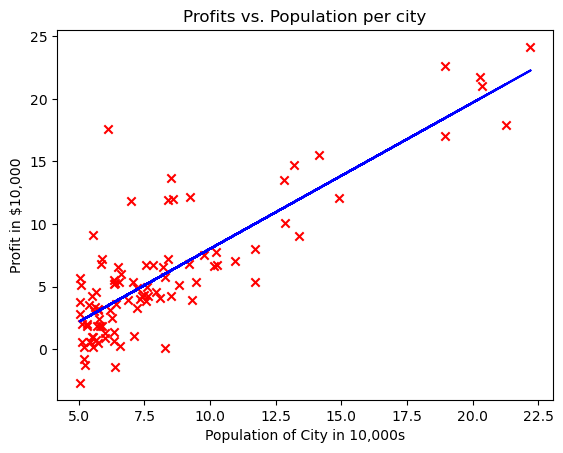

In [23]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [25]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
